# MetroTransit Passenger Trends
## Key questions:
#1. What are the most popular MetroTransit stations, as defined by volume of "Ons" & "Offs"?
#2. What part of the week sees the highest level of MetroTransit traffic?
#3. What is the relationship between station "Ons" & "Offs"?
#4. How has Minnesota's lockdown impacted MetroTransit?

In [1]:
#%matplotlib notebook

# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Save file path to variable
metrotransit_csv = "TransitStopsBoardingsAndAlightings2019.csv"

# Read with Pandas
metrotransit_df = pd.read_csv(metrotransit_csv)
metrotransit_df.head(60)

,Provider,Route Type,Route Classification,Route,Dir,Site_id,Geo_Node_Name,Group ID,latitude,longitude,...,City,Trips,Obs Trips,Schedule,Ons,Offs,Seq,%Sampled,Downtown,Comment
0,Metro Transit,Urban Local,Core Local,2,East,51581.0,HENNEPIN AVE & FRANKLIN AVE / 22ND ST,NaN,44.961886,-93.292079,...,MINNEAPOLIS,92.0,92.0,Weekday,75,8.0,1.0,100%,N,NaN
1,Metro Transit,Urban Local,Core Local,2,East,1099.0,HENNEPIN AVE S & 22ND ST W,NaN,44.961030,-93.292777,...,MINNEAPOLIS,92.0,92.0,Weekday,33,2.0,2.0,100%,N,NaN
2,Metro Transit,Urban Local,Core Local,2,East,13340.0,DUPONT AVE & FRANKLIN AVE W,NaN,44.962534,-93.293016,...,MINNEAPOLIS,92.0,92.0,Weekday,17,1.0,3.0,100%,N,NaN
3,Metro Transit,Urban Local,Core Local,2,East,13337.0,FRANKLIN AVE W & HENNEPIN AVE S,NaN,44.962630,-93.291123,...,MINNEAPOLIS,92.0,92.0,Weekday,177,2.0,4.0,100%,N,NaN
4,Metro Transit,Urban Local,Core Local,2,East,56705.0,FRANKLIN AVE W & LYNDALE AVE S,NaN,44.962642,-93.287697,...,MINNEAPOLIS,92.0,92.0,Weekday,143,4.0,5.0,100%,N,NaN
5,Metro Transit,Urban Local,Core Local,2,East,13330.0,FRANKLIN AVE W & PLEASANT AVE,NaN,44.962635,-93.283040,...,MINNEAPOLIS,92.0,92.0,Weekday,66,8.0,6.0,100%,N,NaN
6,Metro Transit,Urban Local,Core Local,2,East,56697.0,FRANKLIN AVE E & NICOLLET AVE,NaN,44.962615,-93.277632,...,MINNEAPOLIS,92.0,92.0,Weekday,586,72.0,7.0,100%,N,NaN
7,Metro Transit,Urban Local,Core Local,2,East,13320.0,FRANKLIN AVE E & 3RD AVE S,NaN,44.962623,-93.273016,...,MINNEAPOLIS,92.0,92.0,Weekday,249,62.0,8.0,100%,N,NaN
8,Metro Transit,Urban Local,Core Local,2,East,13316.0,FRANKLIN AVE E & PORTLAND AVE,NaN,44.962627,-93.267015,...,MINNEAPOLIS,92.0,92.0,Weekday,131,148.0,9.0,100%,N,NaN
9,Metro Transit,Urban Local,Core Local,2,East,13312.0,FRANKLIN AVE E & CHICAGO AVE,NaN,44.962615,-93.262737,...,MINNEAPOLIS,92.0,92.0,Weekday,210,230.0,10.0,100%,N,NaN


In [2]:
core_local_df=metrotransit_df.loc[metrotransit_df["Route Classification"]=="Core Local"]
print(len(core_local_df["Site_id"].unique()))

5991


In [3]:
#Randomly take 500 sample data from [Route Classification]=="Core Local"
sample_core_local_df = core_local_df.sample(n = 500)
ons = sample_core_local_df["Ons"]
offs = sample_core_local_df["Offs"]

                                         Geo_Node_Name  Ons  Offs
83                            PLEASANT ST & JONES HALL  938   108
3167                          NICOLLET MALL & 7TH ST S  898   107
6189                             5TH ST & MINNESOTA ST  750    34
1775                          NICOLLET MALL & 5TH ST S  724   110
1175                          NICOLLET MALL & 7TH ST S  718   172
5187                        MOA TRANSIT STATION GATE B  678    14
782    CHICAGO AVE S & CHICAGO LAKE TRANSIT CTR GATE C  668   282
26651                       MOA TRANSIT STATION GATE B  667     4
3166                          NICOLLET MALL & 5TH ST S  624    23
911                  6TH ST S & NICOLLET MALL - ARRIVE  603   496
3595             LAKE ST E & LAKE ST - MIDTOWN STATION  602   260
801                             7TH & NICOLLET STATION  592   600
6                        FRANKLIN AVE E & NICOLLET AVE  586    72
23018                       MOA TRANSIT STATION GATE A  551     7
5194      

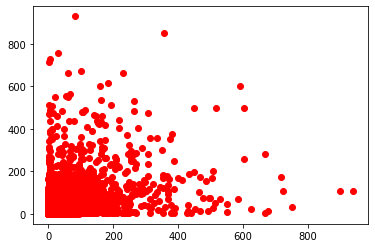

In [14]:
df_station_on=pd.DataFrame(core_local_df,columns=["Geo_Node_Name","Ons","Offs"])
#"ONS" column clean: transfer data type to integer
df_station_on=df_station_on.dropna()
df_station_on["Ons"]=df_station_on["Ons"].str.replace(',', '')
df_station_on["Ons"]=df_station_on["Ons"].astype(int)
df_station_on["Offs"]=df_station_on["Offs"].astype(int)
df_station_max=df_station_on["Ons"].max()
df_station_on=df_station_on.sort_values(by="Ons",ascending=False)
df_station_on_sample=df_station_on.head(30)
print(df_station_on_sample)
plt.scatter(df_station_on["Ons"],df_station_on["Offs"],color="red")
plt.savefig("03_ons scatter plot")
#Print the top 30 Ons Geo_Node_Name

                                  Geo_Node_Name  Ons  Offs
3157                   NICOLLET MALL & 7TH ST S   82   930
22257                  6TH ST S & NICOLLET MALL   66   930
929        CHICAGO LAKE TRANSIT CENTER & GATE A  357   850
20170         MAPLE GROVE P&R & TRANSIT STATION   12   812
21546                FOLEY P&R & EVERGREEN BLVD   15   800
3158                   NICOLLET MALL & 5TH ST S   29   758
5283                 MOA TRANSIT STATION GATE B    5   731
22239           BROOKLYN CTR TRANSIT CTR GATE I    2   726
26747                MOA TRANSIT STATION GATE B    3   715
22180           ROSEDALE TRANSIT CENTER  GATE A    0   712
31500           ROSEDALE TRANSIT CENTER  GATE A    1   682
1133                   NICOLLET MALL & 7TH ST S  101   671
315              PLEASANT ST SE & SCHOLARS WALK   61   664
3182                  BLAISDELL AVE S & LAKE ST  229   661
22200                    46TH ST STATION GATE A    2   654
19599       HWY 610 NOBLE PKWY P&R & 95TH AVE N    5   6

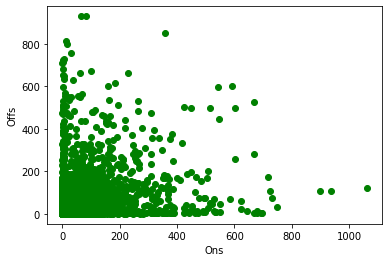

In [15]:
df_station_on=pd.DataFrame(metrotransit_df,columns=["Geo_Node_Name","Ons","Offs"])
df_station_on=df_station_on.dropna()
df_station_on["Ons"]=df_station_on["Ons"].str.replace(',', '')
df_station_on["Ons"]=df_station_on["Ons"].astype(int)
df_station_on["Offs"]=df_station_on["Offs"].astype(int)
df_station_off=df_station_on.sort_values(by="Offs",ascending=False)
df_station_off_sample=df_station_off.head(30)
print(df_station_off_sample)
plt.scatter(df_station_off["Ons"],df_station_off["Offs"],color="green")
plt.xlabel("Ons")
plt.ylabel("Offs")
plt.savefig("03_offs scatter plot")
#The top 30 OFFS Geo_Node_Name

In [6]:
import scipy.stats as st
x_values = df_station_on["Ons"]
y_values = df_station_on["Offs"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
#Linear regression about Ons and Offs
#OFFS=0.39*ONS +6.79

y = 0.39x + 6.79


# Slightly positive relationship between ONS and OFFS

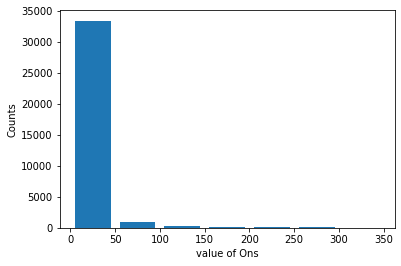

In [16]:
bins = [0,50,100,150,200,250,300,350]
plt.hist(df_station_on["Ons"], bins, histtype='bar', rwidth=0.8)
plt.xlabel("value of Ons")
plt.ylabel("Counts")
plt.savefig("03_ons distribution plot")

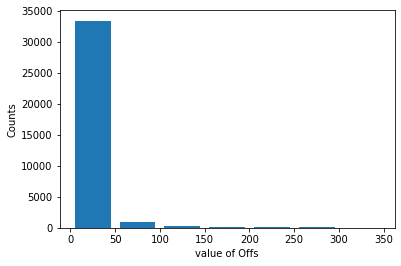

In [17]:
bins = [0,50,100,150,200,250,300,350]
plt.hist(df_station_on["Offs"], bins, histtype='bar', rwidth=0.8)
plt.xlabel("value of Offs")
plt.ylabel("Counts")
plt.savefig("03_offs distribution plot")